# Gaussian Discriminant Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import math

In [2]:
X, y = make_blobs(n_samples=1000, centers=1, n_features=2, random_state=0)

In [3]:
class GDA:
    
    def __init__(self, epsilon=0.02):
        self.epsilon = epsilon
        
    def fit(self, X):
        self.m = sum(X) / len(X)
        self.s = sum((X - self.m) ** 2) / len(X)

        
    def predict(self, X):
        probabilities = []
        for x in X:
            p = 1
            for i in range(len(x)):
                e = math.exp( -((x[i] - self.m[i]) ** 2) / (2 * self.s[i]) )
                p *= (1 / (math.sqrt(2 * math.pi) * self.s[i])) * e
            probabilities.append(p)
        predictions = [int(p < self.epsilon) for p in probabilities]
        return np.array(predictions)

In [4]:
gda = GDA()
gda.fit(X)
predictions = gda.predict(X)

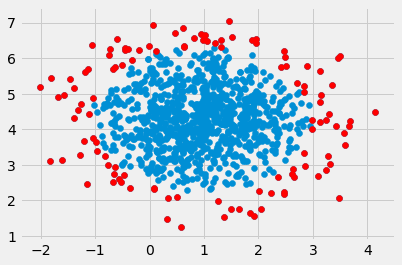

In [5]:
anomalies = []
for i in range(len(predictions)):
    if predictions[i] == 1:
        anomalies.append(X[i])
    
anomalies = np.array(anomalies)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r')